<a href="https://colab.research.google.com/github/MLUISG/Projects/blob/main/Mark_Guereque_Albuquerque_Food_Inspections_2012_2022_Capstone_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone: Albuquerque Food Inspections

## Imports

In [ ]:
!pip install mord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade mord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import statsmodels.api as sm
import graphviz
from IPython.display import display
from sklearn import tree
import sklearn
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from IPython.display import Image
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
import numpy as np

##Mark's Radical Functions

In [ ]:
def show_me(df):
  """Displays info, describe, head, and tail

Money in the bank,
Show me the stats and details,
Info, head, tail, done."""
  print('Info')
  print(df.info())
  print('\n')
  print('\n')
  print('Described')
  print(df.describe().T)
  print('\n')
  print('\n')
  print('Head')
  print(df.head().T)
  print('\n')
  print('\n')
  print('Tail')
  print(df.tail().T)

In [ ]:
def find_tuple_cols(df):
  """Identifies tuples in all columns in a dataframe

Tuple columns sought,
Amidst the data's great breadth,
Found and returned whole."""
  tuple_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, tuple)).any()]
  return tuple_cols

In [ ]:
def convert_tuples_to_lists(df):
  """Loops through columns, converting tuples

From tuples to lists,
DataFrame transformed with ease,
Data now unbound."""
  for col in df.columns:
      if type(df[col][0]) == tuple:
          df[col] = df[col].apply(list)
  return df

In [ ]:
def all_the_value_counts(df):
    """Prints the value counts for all columns in a pandas DataFrame

Counting values wide,
All columns, one by one revealed,
Insight to be found."""
    for column in df.columns:
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")

In [ ]:
def remove_outliers(df):
  """Removes outliers from all columns in a dataframe with a threshold of 3* STD

Outliers expelled,
Data purged of impurities,
Clean and pristine now."""
  cleaned_data = df
  for col in df.columns:
      mean = df[col].mean()
      std = df[col].std()
      threshold = 3 * std
      lower_bound = mean - threshold
      upper_bound = mean + threshold
      cleaned_data[col] = df[col][(df[col] > lower_bound) & (df[col] < upper_bound)]
  return cleaned_data

In [ ]:
def count_the_cats(df):
    """Prints the value counts for categorical columns in a pandas DataFrame

Meow, count the cats,
Categorical values,
Pandas purrs content.
    """
    for column in df.select_dtypes(include=["category", "object"]).columns:
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")

In [ ]:
def impute_means(df):
  """Imputes the mean value of a column to all null values in that column

Missing values found,
Impute means to numeric cols,
Clean data once more."""
  for col in df.columns:
        if df[col].isna().sum() == 0:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
  return df

In [ ]:
def count_nulls(data):
    """Checks for null values and displays only nulls

Null values abound,
Display them with a function,
Data cleaning done."""
    temp = data.isna().sum()
    filter = temp > 0
    print(data.shape)
    print(temp[filter])

In [ ]:
def per_values(data, column_name):
    """Checks for values and displays their percentage.

    Args:
    data (pandas.DataFrame): DataFrame to check.
    column_name (str): Name of column to check.

    Returns:
    None
    """
    value_counts = data[column_name].value_counts()
    total = value_counts.sum()
    percent = round(value_counts/total * 100, 2)
    print(f"Percentage of values in {column_name}:")
    print(percent)

In [ ]:
def per_nulls(data):
    """Checks for null values and displays their percentage.

Null values lurking,
Percentage uncovered,
Data now refined."""
    total = data.isna().sum().sort_values(ascending=False)
    percent = round((data.isna().sum()/data.isna().count()*100), 2).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total'] > 0]
    print("Missing data percentage:\n", missing_data)

In [ ]:
def cull_values(df, column_name, threshold):
    """
    Deletes rows from a Pandas DataFrame if they have a value count less than the specified threshold.

    Parameters:
        - df (pandas.DataFrame): the DataFrame to process.
        - column_name (str): the name of the column to check.
        - threshold (float): the minimum percentage of non-null values required for a row to be kept.

    Returns:
        - pandas.DataFrame: the processed DataFrame.
    """
    value_counts = df[column_name].value_counts()
    total_rows = len(df)
    to_drop = value_counts[value_counts/total_rows*100 < threshold].index
    return df[~df[column_name].isin(to_drop)]

In [ ]:
def cull_nulls(df, threshold):
    """
    Deletes columns from a Pandas DataFrame if they have more null values than the specified threshold.

    Parameters:
        - df (pandas.DataFrame): the DataFrame to process.
        - threshold (float): the maximum percentage of null values allowed for a column to be kept.

    Returns:
        - pandas.DataFrame: the processed DataFrame.

A data grave threat,
Nulls swarm and infect the set,
Cull them, make it clean.
    """
    null_counts = df.isnull().sum()
    null_percentages = null_counts / len(df) * 100
    to_drop = null_percentages[null_percentages > threshold].index
    return df.drop(to_drop, axis=1)

In [ ]:
def forest_features(df, target):
    """
    This function uses random forest regression to predict a target variable from a given pandas DataFrame.
    It splits the data into training and testing sets, trains a random forest regressor model on the training set,
    and calculates the evaluation metrics on the testing set. This process is repeated multiple times to
    calculate the mean evaluation metrics. The function also plots the feature importance in descending order to
    provide insights into which features are most important for the model's predictions.
    """
    X = df.drop(target, axis=1)
    y = df[target]
    num_loops = 1
    metrics = {
        "RMSE": np.zeros(num_loops),
        "Accuracy": np.zeros(num_loops),
        "Precision": np.zeros(num_loops),
        "Recall": np.zeros(num_loops),
        "F1-score": np.zeros(num_loops),
    }

    np.random.seed(42)
    for idx in range(num_loops):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = RandomForestClassifier(n_estimators=5, max_depth=8)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate RMSE for continuous target variable
        if y_test.dtype == "float64":
            metrics["RMSE"][idx] = mean_squared_error(y_test, y_pred)

        # Evaluate classification metrics for nominal target variable
        else:
            y_pred = np.round(y_pred)
            metrics["Accuracy"][idx] = accuracy_score(y_test, y_pred)
            metrics["Precision"][idx] = precision_score(y_test, y_pred, average="weighted")
            metrics["Recall"][idx] = recall_score(y_test, y_pred, average="weighted")
            metrics["F1-score"][idx] = f1_score(y_test, y_pred, average="weighted")

    # Print evaluation metrics
    print("Evaluation metrics:")
    for metric, values in metrics.items():
        mean_value = np.mean(values)
        std_value = np.std(values)
        print(f"{metric}: {mean_value:.3f} ± {std_value:.3f}")

    # Plot feature importance
    importances = model.feature_importances_
    forest_importances = pd.Series(importances, index=X.columns)
    forest_importances.sort_values(ascending=False, inplace=True)
    plt.figure(figsize=(10,8))
    forest_importances.plot.bar()
    plt.title("Feature importance")
    plt.ylabel("Mean decrease in impurity")


In [ ]:
def sort_by_date(df, date_column):
  """
  Sorts a pandas DataFrame in place by a specified date column.

Time is of essence,
Data waits, unsorted, cluttered,
Sort by date, in place.
  """
  df[date_column] = pd.to_datetime(df[date_column])
  df.sort_values(by=[date_column], inplace=True)

# The Data



###Load Data

###Mounting Data

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
path_fy13 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2013-en-us.csv'
path_fy14 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2014-en-us.csv'
path_fy15 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2015-en-us.csv'
path_fy16 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2016-en-us.csv'
path_fy17 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2017-en-us.csv'
path_fy18 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2018-en-us.csv'
path_fy19 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2019-en-us.csv'
path_fy20 = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsFY2020-en-us.csv'
path_current = '/drive/My Drive/Capstone/Data/2013-2022/FoodInspectionsCurrentFY.csv'

##All Data and Master Data
I brought in all my data as individual dataframes by fiscal year. My plan is to concatenate all of them to make one master dataframe.

In [ ]:
data_fy13 = pd.read_csv(path_fy13, delimiter='\t', encoding='UTF-16')
data_fy14 = pd.read_csv(path_fy14, delimiter='\t', encoding='UTF-16')
data_fy15 = pd.read_csv(path_fy15, delimiter='\t', encoding='UTF-16')
data_fy16 = pd.read_csv(path_fy16, delimiter='\t', encoding='UTF-16')
data_fy17 = pd.read_csv(path_fy17, delimiter='\t', encoding='UTF-16')
data_fy18 = pd.read_csv(path_fy18, delimiter='\t', encoding='UTF-16')
data_fy19 = pd.read_csv(path_fy19, delimiter='\t', encoding='UTF-16')
data_fy20 = pd.read_csv(path_fy20, delimiter='\t', encoding='UTF-16')
data_current = pd.read_csv(path_current, delimiter='\t', encoding='UTF-16')

<ipython-input-90-e03ecda60fe1>:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fy13 = pd.read_csv(path_fy13, delimiter='\t', encoding='UTF-16')
<ipython-input-90-e03ecda60fe1>:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fy14 = pd.read_csv(path_fy14, delimiter='\t', encoding='UTF-16')
<ipython-input-90-e03ecda60fe1>:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fy15 = pd.read_csv(path_fy15, delimiter='\t', encoding='UTF-16')
<ipython-input-90-e03ecda60fe1>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fy16 = pd.read_csv(path_fy16, delimiter='\t', encoding='UTF-16')
<ipython-input-90-e03ecda60fe1>:5: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fy17 = pd.read_csv(pat

In [ ]:
master_data = pd.concat([data_fy13, data_fy14, data_fy15, data_fy16, data_fy17, data_fy18, data_fy19, data_fy20, data_current], ignore_index=True)

## Collection/Source
Data is gathered from the City of Albuquerque website and is found at http://data.cabq.gov/business/foodinspections/. The data has a gap of FY 21.

##IDA intitial data analaysis

###Data Info

In [ ]:
#This function will present the df info, describe, head, and tail.
show_me(master_data)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073648 entries, 0 to 2073647
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   FACILITY_NAME                 object 
 1   FACILITY_KEY                  int64  
 2   SITE_ADDRESS                  object 
 3   CITY                          object 
 4   STATE                         object 
 5   ZIP                           object 
 6   OWNER_KEY                     int64  
 7   OWNER_NAME                    object 
 8   NATURE_OF_BUSINESS            object 
 9   STREET_NUMBER                 object 
 10  STREET_NAME                   object 
 11  STREET_TYPE                   object 
 12  POST_DIRECTIONAL              object 
 13  PHONE                         float64
 14  PROGRAM_CATEGORY              int64  
 15  PROGRAM_CATEGORY_DESCRIPTION  object 
 16  INSPECTION_DATE               object 
 17  INSPECTION_TYPE               float64
 18  INSPECTION_DESC  

In [ ]:
master_data.dtypes

FACILITY_NAME                    object
FACILITY_KEY                      int64
SITE_ADDRESS                     object
CITY                             object
STATE                            object
ZIP                              object
OWNER_KEY                         int64
OWNER_NAME                       object
NATURE_OF_BUSINESS               object
STREET_NUMBER                    object
STREET_NAME                      object
STREET_TYPE                      object
POST_DIRECTIONAL                 object
PHONE                           float64
PROGRAM_CATEGORY                  int64
PROGRAM_CATEGORY_DESCRIPTION     object
INSPECTION_DATE                  object
INSPECTION_TYPE                 float64
INSPECTION_DESC                  object
SERIAL_NUM                       object
ACTION_CODE                       int64
ACTION_DESC                      object
RESULT_CODE                       int64
RESULT_DESC                      object
VIOLATION_CODE                   object


I can immediately see there are a lot of objects and I'm going to have to change some to new types, i.e. INSPECTION_DATE to date type.

###Value Counts

In [ ]:
count_the_cats(master_data)

Value counts for FACILITY_NAME:
SMITHS FOOD AND DRUG CENTERS INC                                    17600
ISOTOPES PARK - OVATIONS                                            12069
SUBWAY                                                              10550
SPROUTS FARMERS MARKET                                              10495
LA PETITE ACADEMY                                                    6677
                                                                    ...  
PER EHSII RANDY MARTINEZ FACILITY OOB 02/28/16 SANDWICH CO.  THE        1
PER EHSII CECELIA GARCIA FACILITY OOB LAMS CHINESE RESTAURANT 1         1
APNA BAZAAR                                                             1
PER EHSII MICHAEL PITTMAN FA OOB 1/30/16 THE GREEK GEEK                 1
PER EHSII CECELIA GARCIA FA OOB 03/23/16 PHOENIX PLAZA                  1
Name: FACILITY_NAME, Length: 6371, dtype: int64


Value counts for SITE_ADDRESS:
1601 AVENIDA CESAR CHAVEZ SE     12069
1601 4TH ST NW                   1

###Null Count

In [ ]:
#This function will display only nulls if there are any
count_nulls(master_data)

(2073648, 27)
SITE_ADDRESS             1173
NATURE_OF_BUSINESS     830713
STREET_NUMBER            1381
STREET_NAME              1173
STREET_TYPE            153035
POST_DIRECTIONAL        32477
PHONE                  246417
INSPECTION_TYPE       2073223
INSPECTION_DESC           172
VIOLATION_CODE           4235
VIOLATION_DESC           4235
INSPECTION_MEMO       2007348
dtype: int64


In [ ]:
all_nulls = master_data.isnull().sum().sum()
print(all_nulls)

5355582


In [ ]:
per_nulls(master_data)

Missing data percentage:
                       Total  Percent
INSPECTION_TYPE     2073223    99.98
INSPECTION_MEMO     2007348    96.80
NATURE_OF_BUSINESS   830713    40.06
PHONE                246417    11.88
STREET_TYPE          153035     7.38
POST_DIRECTIONAL      32477     1.57
VIOLATION_DESC         4235     0.20
VIOLATION_CODE         4235     0.20
STREET_NUMBER          1381     0.07
STREET_NAME            1173     0.06
SITE_ADDRESS           1173     0.06
INSPECTION_DESC         172     0.01


There is also an overwhelming number of nulls. I will use my function cull_nulls when I clean my data to quickly remove columns that have too many nulls.

##Data Overview

By combining several dataframes we now have a large data set with 2,073,648 rows, 27 columns, and 5,355,582 nulls.

# Data Cleaning
The first thing I want to do is convert INSPECTION_DATE to datetime64[ns] type and sort my data starting with oldest data entry.

In [ ]:
#This function turns a column into a datetime64[ns] and organizes the df by date
sort_by_date(master_data,'INSPECTION_DATE')

In [ ]:
master_data['INSPECTION_DATE']

254352    2012-07-02
31590     2012-07-02
31589     2012-07-02
31588     2012-07-02
31587     2012-07-02
             ...    
2062624   2022-12-08
2062625   2022-12-08
2062626   2022-12-08
2062616   2022-12-08
2058473   2022-12-08
Name: INSPECTION_DATE, Length: 2073648, dtype: datetime64[ns]

##Null Culling
Now I'm going to remove columns with nulls greater than 35%.

In [ ]:
working_copy = cull_nulls(master_data, 35)

In [ ]:
count_nulls(working_copy)

(2073648, 24)
SITE_ADDRESS          1173
STREET_NUMBER         1381
STREET_NAME           1173
STREET_TYPE         153035
POST_DIRECTIONAL     32477
PHONE               246417
INSPECTION_DESC        172
VIOLATION_CODE        4235
VIOLATION_DESC        4235
dtype: int64


##Dropping Columns
I'm going to drop PHONE because it won't help in the future.

In [ ]:
working_copy.drop('PHONE', axis=1, inplace=True)
working_copy.drop('STREET_NUMBER', axis=1, inplace=True)
working_copy.drop('STREET_TYPE', axis=1, inplace=True)
working_copy.drop('VIOLATION_DESC', axis=1, inplace=True)
working_copy.drop('SITE_ADDRESS', axis=1, inplace=True)
working_copy.drop('VIOLATION_CODE', axis=1, inplace=True)
working_copy.drop('SERIAL_NUM', axis=1, inplace=True)
working_copy.drop('PROGRAM_CATEGORY', axis=1, inplace=True)
working_copy.drop('POST_DIRECTIONAL', axis=1, inplace=True)
working_copy.drop('OWNER_KEY', axis=1, inplace=True)
working_copy.drop('ACTION_CODE', axis=1, inplace=True)
working_copy.drop('RESULT_CODE', axis=1, inplace=True)
working_copy.drop('PROGRAM_CATEGORY_DESCRIPTION', axis=1, inplace=True)
working_copy.drop('ZIP', axis=1, inplace=True)

In [ ]:
#working_copy.drop('ZIP', axis=1, inplace=True)

In [ ]:
working_copy.shape

(2073648, 10)

In [ ]:
working_copy.dtypes

FACILITY_NAME              object
FACILITY_KEY                int64
CITY                       object
STATE                      object
OWNER_NAME                 object
STREET_NAME                object
INSPECTION_DATE    datetime64[ns]
INSPECTION_DESC            object
ACTION_DESC                object
RESULT_DESC                object
dtype: object

In [ ]:
print(working_copy['CITY'].value_counts())

ALBUQUERQUE       2073255
EDGEWOOD              179
BELEN                 123
EL PASO                58
SANDIA PARK            30
PLACITAS                1
PARADISE HILLS          1
BERNALILLO              1
Name: CITY, dtype: int64


In [ ]:
working_copy = working_copy[working_copy['CITY'] == 'ALBUQUERQUE']


In [ ]:
print(working_copy['STATE'].value_counts())

NM    2072729
87        526
Name: STATE, dtype: int64


In [ ]:
working_copy = working_copy[working_copy['STATE'] == 'NM']

In [ ]:
working_copy.drop('CITY', axis=1, inplace=True)
working_copy.drop('STREET_NAME', axis=1, inplace=True)
working_copy.drop('STATE', axis=1, inplace=True)
working_copy.drop('FACILITY_NAME', axis=1, inplace=True)

In [ ]:
working_copy.shape

(2072729, 6)

In [ ]:
per_values(working_copy, 'INSPECTION_DESC')

Percentage of values in INSPECTION_DESC:
ROUTINE FOOD INSPECTION                             75.76
HIGH RISK                                            8.65
PRE-OPENING FOOD INSPECTION                          4.51
VERY HIGH RISK                                       3.74
New Business Inspection                              3.69
MOBILE UNIT FOOD INSPECTION                          1.23
FOOD FOLLOW-UP INSPECTION                            0.98
PRE OPENING/PERMIT APPLICATION ISSUED                0.50
VIRTUAL INSPECTION                                   0.20
QUALITY ASSURANCE REVIEW                             0.18
QUARTERLY REVIEW                                     0.11
ADDITIONAL SERVICE PROVIDED                          0.09
ON SITE TRAINING                                     0.05
SITE VISIT                                           0.05
COMPLAINT FOOD INSPECTION                            0.05
TEMPORARY FOOD INSPECTION                            0.03
PHONE CALL                     

In [ ]:
working_copy = cull_values(working_copy, 'INSPECTION_DESC', 0.5)

In [ ]:
per_values(working_copy, 'RESULT_DESC')

Percentage of values in RESULT_DESC:
IN COMPLIANCE                            98.13
UPGRADE                                   0.57
NOT APPLICABLE                            0.42
DOWNGRADE                                 0.39
IMMEDIATE CLOSURE                         0.19
NOT IN COMPLIANCE                         0.18
PERMIT SUSPENSION                         0.08
PERMIT REINSTATEMENT                      0.02
FACILITY CLOSED AT TIME OF INSPECTION     0.02
NOTICE                                    0.01
WITNESS TO DESTRUCTION                    0.00
EMBARGO                                   0.00
OUT OF BUSINESS                           0.00
PLAN REVIEW -APPROVED                     0.00
Name: RESULT_DESC, dtype: float64


In [ ]:
working_copy = cull_values(working_copy, 'RESULT_DESC', 0.08)

In [ ]:
working_copy = working_copy[~working_copy['RESULT_DESC'].str.contains('IN COMPLIANCE')]

In [ ]:
per_values(working_copy, 'ACTION_DESC')

Percentage of values in ACTION_DESC:
APPROVED                              37.87
UNSATISFACTORY                        35.89
NON-GRADED                            25.30
FOOD PERMIT SUSPENSION                 0.62
TEMPORARY FOOD CLOSED                  0.19
FACILITY CLOSED AT TIME OF SERVICE     0.13
Name: ACTION_DESC, dtype: float64


In [ ]:
inspections_to_keep = ['APPROVED', 'UNSATISFACTORY', 'NON-GRADED', 'FOOD PERMIT SUSPENSION']

# Filter the working_copy DataFrame
working_copy = working_copy[working_copy['ACTION_DESC'].isin(inspections_to_keep)]

In [ ]:
all_the_value_counts(working_copy)

Value counts for FACILITY_KEY:
86305     638
92750     256
51074     244
16077     244
46211     232
         ... 
108783      1
101207      1
108392      1
102075      1
108025      1
Name: FACILITY_KEY, Length: 646, dtype: int64


Value counts for OWNER_NAME:
TEMP EVENTS FY09                    758
SMITHS FOOD AND DRUG CENTERS INC    317
NINE FORTUNE LLC                    256
RIO GRANDE INN LTD. COMPANY         244
LUCKY LOUNGE INC                    244
                                   ... 
ARTISTIC INTERNET, LLC                1
DOS GREENGOS II LLC                   1
E & M INC                             1
SWEET CRAVINGS                        1
BEST HARVEST PRODUCE                  1
Name: OWNER_NAME, Length: 603, dtype: int64


Value counts for INSPECTION_DATE:
2012-09-19    366
2013-01-18    307
2012-11-30    305
2012-09-24    244
2012-08-31    244
             ... 
2014-07-17      1
2014-06-16      1
2020-02-07      1
2013-09-12      1
2013-04-04      1
Name: INSPECTION_DAT

In [ ]:
working_copy.dtypes

FACILITY_KEY                int64
OWNER_NAME                 object
INSPECTION_DATE    datetime64[ns]
INSPECTION_DESC            object
ACTION_DESC                object
RESULT_DESC                object
dtype: object

In [ ]:
working_copy['YEAR'] = working_copy['INSPECTION_DATE'].dt.year
working_copy['MONTH'] = working_copy['INSPECTION_DATE'].dt.month
working_copy['DAY'] = working_copy['INSPECTION_DATE'].dt.day
working_copy['DAY_OF_WEEK'] = working_copy['INSPECTION_DATE'].dt.dayofweek

In [ ]:
working_copy.drop('INSPECTION_DATE', axis=1, inplace=True)

In [ ]:
#working_copy['ZIP'] = working_copy['ZIP'].astype(str).apply(lambda x: x[:5])


In [ ]:
#working_copy['ZIP'] = working_copy['ZIP'].astype(str).apply(lambda x: int(x.replace('-', '')))

In [ ]:
#working_copy['ZIP'] = working_copy['ZIP'].astype(int)

In [ ]:
#working_copy['ZIP'].value_counts()

In [ ]:
#working_copy['ZIP']

In [ ]:
#working_copy['ZIP'] = working_copy['ZIP'].str.replace(r'\D', '')
#working_copy['ZIP'] = pd.to_numeric(working_copy['ZIP'], errors='coerce').fillna(0).astype(int)

In [ ]:
#This is the codeblock where I convert objects into floats
#working_copy['ZIP'] = working_copy['ZIP'].astype(float)
#working_copy['OWNER_NAME'] = working_copy['OWNER_NAME'].astype(float)
#working_copy['PROGRAM_CATEGORY_DESCRIPTION'] = working_copy['PROGRAM_CATEGORY_DESCRIPTION'].astype(float)
#working_copy['INSPECTION_DESC'] = working_copy['INSPECTION_DESC'].astype(float)
#working_copy['ACTION_DESC'] = working_copy['ACTION_DESC'].astype(float)
#working_copy['RESULT_DESC'] = working_copy['RESULT_DESC'].astype(float)

In [ ]:
working_copy.dtypes

FACILITY_KEY        int64
OWNER_NAME         object
INSPECTION_DESC    object
ACTION_DESC        object
RESULT_DESC        object
YEAR                int64
MONTH               int64
DAY                 int64
DAY_OF_WEEK         int64
dtype: object

In [ ]:
encoded_data = pd.get_dummies(working_copy[['INSPECTION_DESC', 'ACTION_DESC', 'RESULT_DESC']])
numeric_data = working_copy[['OWNER_NAME', 'FACILITY_KEY','YEAR','MONTH','DAY','DAY_OF_WEEK']]
processed_data = pd.concat([numeric_data, encoded_data], axis=1)


In [ ]:
processed_data.dtypes

OWNER_NAME                                               object
FACILITY_KEY                                              int64
YEAR                                                      int64
MONTH                                                     int64
DAY                                                       int64
DAY_OF_WEEK                                               int64
INSPECTION_DESC_FOOD FOLLOW-UP INSPECTION                 uint8
INSPECTION_DESC_HIGH RISK                                 uint8
INSPECTION_DESC_MOBILE UNIT FOOD INSPECTION               uint8
INSPECTION_DESC_New Business Inspection                   uint8
INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED     uint8
INSPECTION_DESC_PRE-OPENING FOOD INSPECTION               uint8
INSPECTION_DESC_ROUTINE FOOD INSPECTION                   uint8
INSPECTION_DESC_VERY HIGH RISK                            uint8
ACTION_DESC_APPROVED                                      uint8
ACTION_DESC_FOOD PERMIT SUSPENSION      

In [ ]:
processed_data.shape

(32005, 22)

In [ ]:
processed_data.drop(['FACILITY_KEY', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK'], axis=1, inplace=True)

In [ ]:
processed_data.dtypes

OWNER_NAME                                               object
INSPECTION_DESC_FOOD FOLLOW-UP INSPECTION                 uint8
INSPECTION_DESC_HIGH RISK                                 uint8
INSPECTION_DESC_MOBILE UNIT FOOD INSPECTION               uint8
INSPECTION_DESC_New Business Inspection                   uint8
INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED     uint8
INSPECTION_DESC_PRE-OPENING FOOD INSPECTION               uint8
INSPECTION_DESC_ROUTINE FOOD INSPECTION                   uint8
INSPECTION_DESC_VERY HIGH RISK                            uint8
ACTION_DESC_APPROVED                                      uint8
ACTION_DESC_FOOD PERMIT SUSPENSION                        uint8
ACTION_DESC_NON-GRADED                                    uint8
ACTION_DESC_UNSATISFACTORY                                uint8
RESULT_DESC_DOWNGRADE                                     uint8
RESULT_DESC_IMMEDIATE CLOSURE                             uint8
RESULT_DESC_NOT APPLICABLE              

In [ ]:
processed_data['OWNER_NAME'].value_counts()

TEMP EVENTS FY09                    758
SMITHS FOOD AND DRUG CENTERS INC    317
NINE FORTUNE LLC                    256
RIO GRANDE INN LTD. COMPANY         244
LUCKY LOUNGE INC                    244
                                   ... 
ARTISTIC INTERNET, LLC                1
DOS GREENGOS II LLC                   1
E & M INC                             1
SWEET CRAVINGS                        1
BEST HARVEST PRODUCE                  1
Name: OWNER_NAME, Length: 603, dtype: int64

In [ ]:
# Create a dictionary to map unique values in 'OWNER_NAME' to numerical values
owner_map = {}
unique_values = processed_data['OWNER_NAME'].unique()
for i, val in enumerate(unique_values):
    owner_map[val] = i

# Map 'OWNER_NAME' to numerical values
processed_data['OWNER_NAME_ID'] = processed_data['OWNER_NAME'].map(owner_map)

In [ ]:
processed_data.drop(['OWNER_NAME'], axis=1, inplace=True)

In [ ]:
processed_data.dtypes

INSPECTION_DESC_FOOD FOLLOW-UP INSPECTION                uint8
INSPECTION_DESC_HIGH RISK                                uint8
INSPECTION_DESC_MOBILE UNIT FOOD INSPECTION              uint8
INSPECTION_DESC_New Business Inspection                  uint8
INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED    uint8
INSPECTION_DESC_PRE-OPENING FOOD INSPECTION              uint8
INSPECTION_DESC_ROUTINE FOOD INSPECTION                  uint8
INSPECTION_DESC_VERY HIGH RISK                           uint8
ACTION_DESC_APPROVED                                     uint8
ACTION_DESC_FOOD PERMIT SUSPENSION                       uint8
ACTION_DESC_NON-GRADED                                   uint8
ACTION_DESC_UNSATISFACTORY                               uint8
RESULT_DESC_DOWNGRADE                                    uint8
RESULT_DESC_IMMEDIATE CLOSURE                            uint8
RESULT_DESC_NOT APPLICABLE                               uint8
RESULT_DESC_UPGRADE                                    

In [ ]:
processed_data.shape

(32005, 17)

<Axes: >

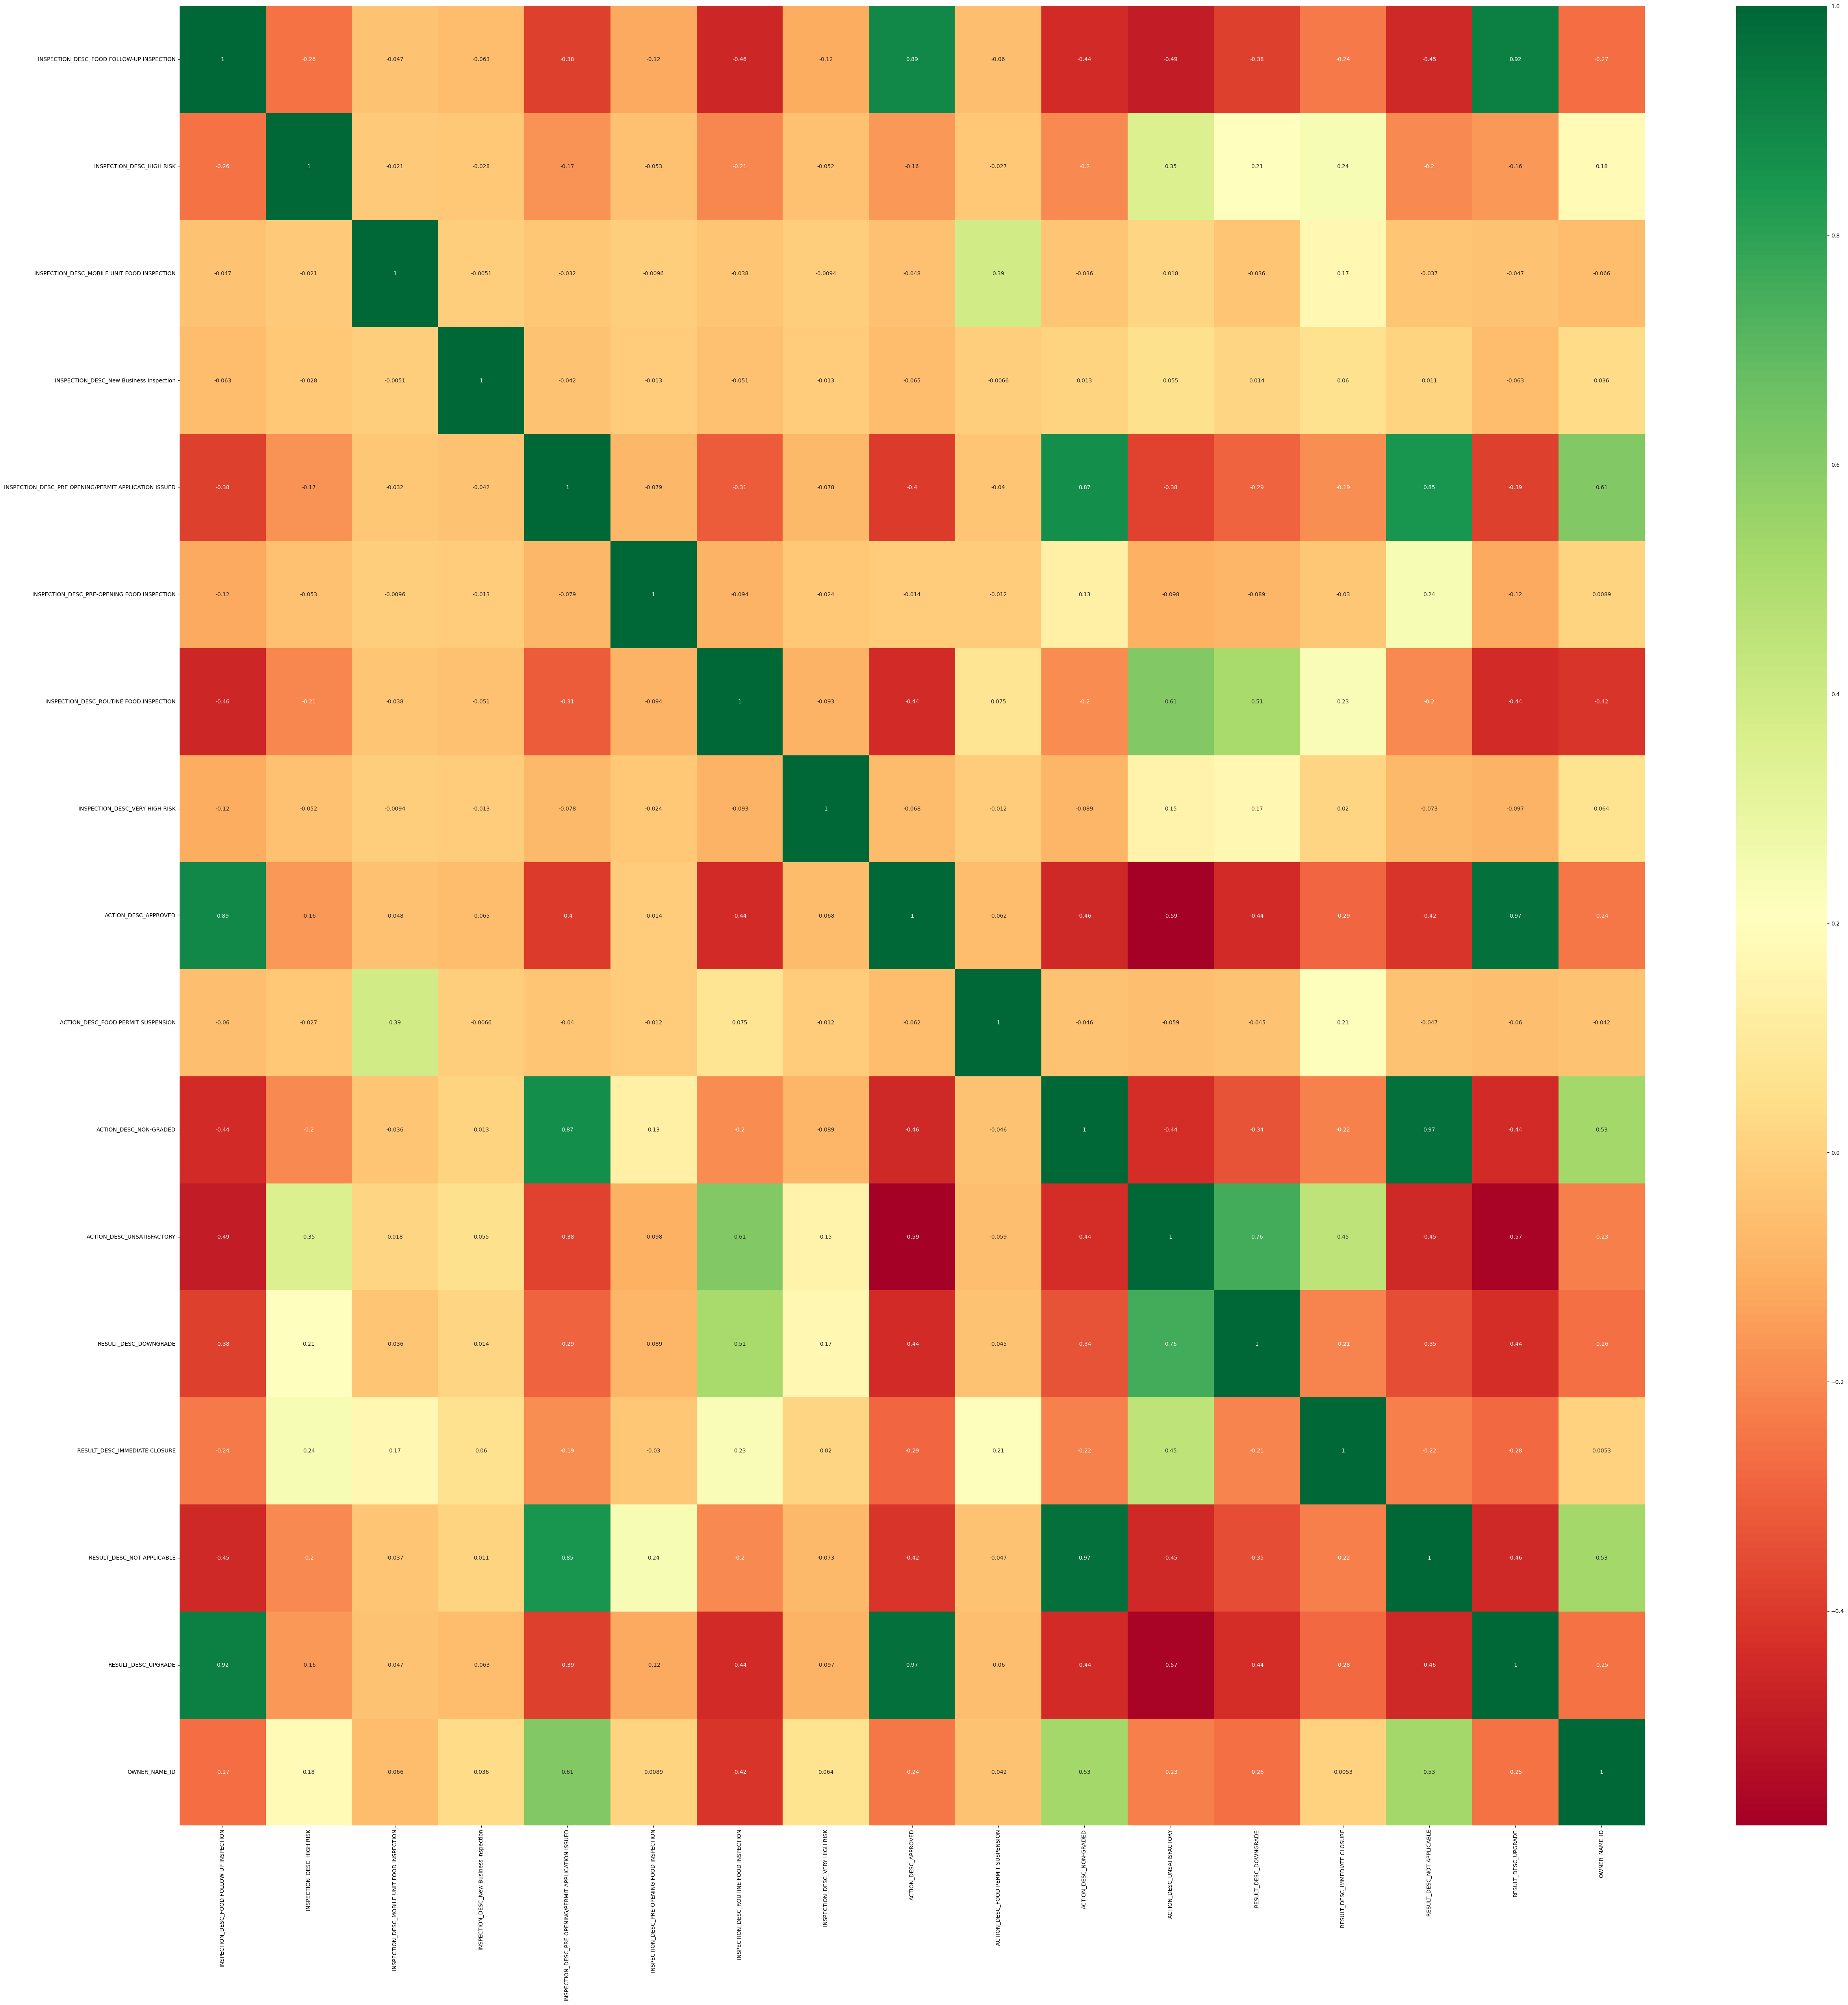

In [ ]:
data_corr = processed_data.corr()
plt.figure(figsize=(60,60))
sns.heatmap(data_corr, annot=True, cmap='RdYlGn')

Now my data is ready for modeling and testing with Random Forest for further feature selection.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation metrics:
RMSE: 0.000 ± 0.000
Accuracy: 0.082 ± 0.000
Precision: 0.037 ± 0.000
Recall: 0.082 ± 0.000
F1-score: 0.039 ± 0.000


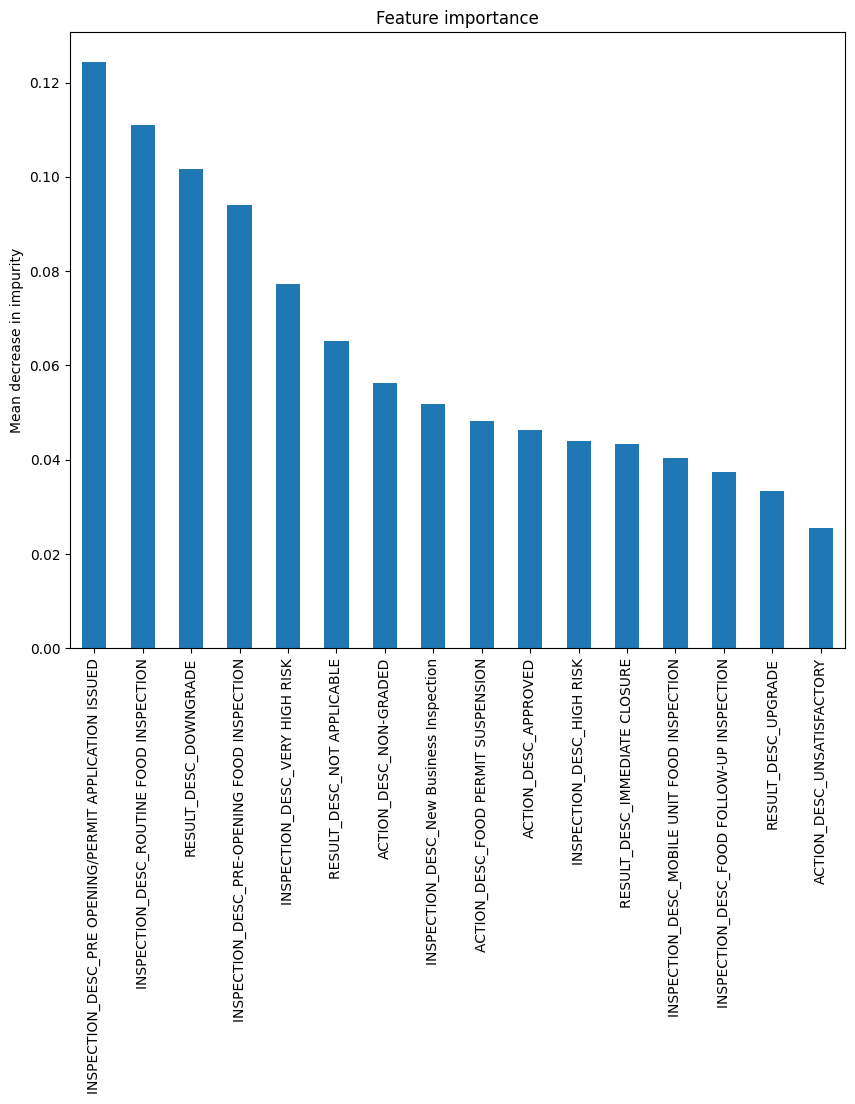

In [ ]:
forest_features(processed_data, 'OWNER_NAME_ID')

In [ ]:
processed_data.dtypes

INSPECTION_DESC_FOOD FOLLOW-UP INSPECTION                uint8
INSPECTION_DESC_HIGH RISK                                uint8
INSPECTION_DESC_MOBILE UNIT FOOD INSPECTION              uint8
INSPECTION_DESC_New Business Inspection                  uint8
INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED    uint8
INSPECTION_DESC_PRE-OPENING FOOD INSPECTION              uint8
INSPECTION_DESC_ROUTINE FOOD INSPECTION                  uint8
INSPECTION_DESC_VERY HIGH RISK                           uint8
ACTION_DESC_APPROVED                                     uint8
ACTION_DESC_FOOD PERMIT SUSPENSION                       uint8
ACTION_DESC_NON-GRADED                                   uint8
ACTION_DESC_UNSATISFACTORY                               uint8
RESULT_DESC_DOWNGRADE                                    uint8
RESULT_DESC_IMMEDIATE CLOSURE                            uint8
RESULT_DESC_NOT APPLICABLE                               uint8
RESULT_DESC_UPGRADE                                    

In [ ]:
top_ten = processed_data[['OWNER_NAME_ID',
                          'INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED',
                          'INSPECTION_DESC_ROUTINE FOOD INSPECTION',
                          'RESULT_DESC_DOWNGRADE',
                          'INSPECTION_DESC_PRE-OPENING FOOD INSPECTION',
                          'INSPECTION_DESC_VERY HIGH RISK',
                          'RESULT_DESC_NOT APPLICABLE',
                          'ACTION_DESC_NON-GRADED',
                          'INSPECTION_DESC_New Business Inspection',
                          'ACTION_DESC_FOOD PERMIT SUSPENSION',
                          'ACTION_DESC_APPROVED']]

In [ ]:
top_five = processed_data[['OWNER_NAME_ID',
                           'INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED',
                           'INSPECTION_DESC_ROUTINE FOOD INSPECTION',
                           'RESULT_DESC_DOWNGRADE',
                           'INSPECTION_DESC_PRE-OPENING FOOD INSPECTION',
                           'INSPECTION_DESC_VERY HIGH RISK']]

#EDA

##Correation Data

<Axes: >

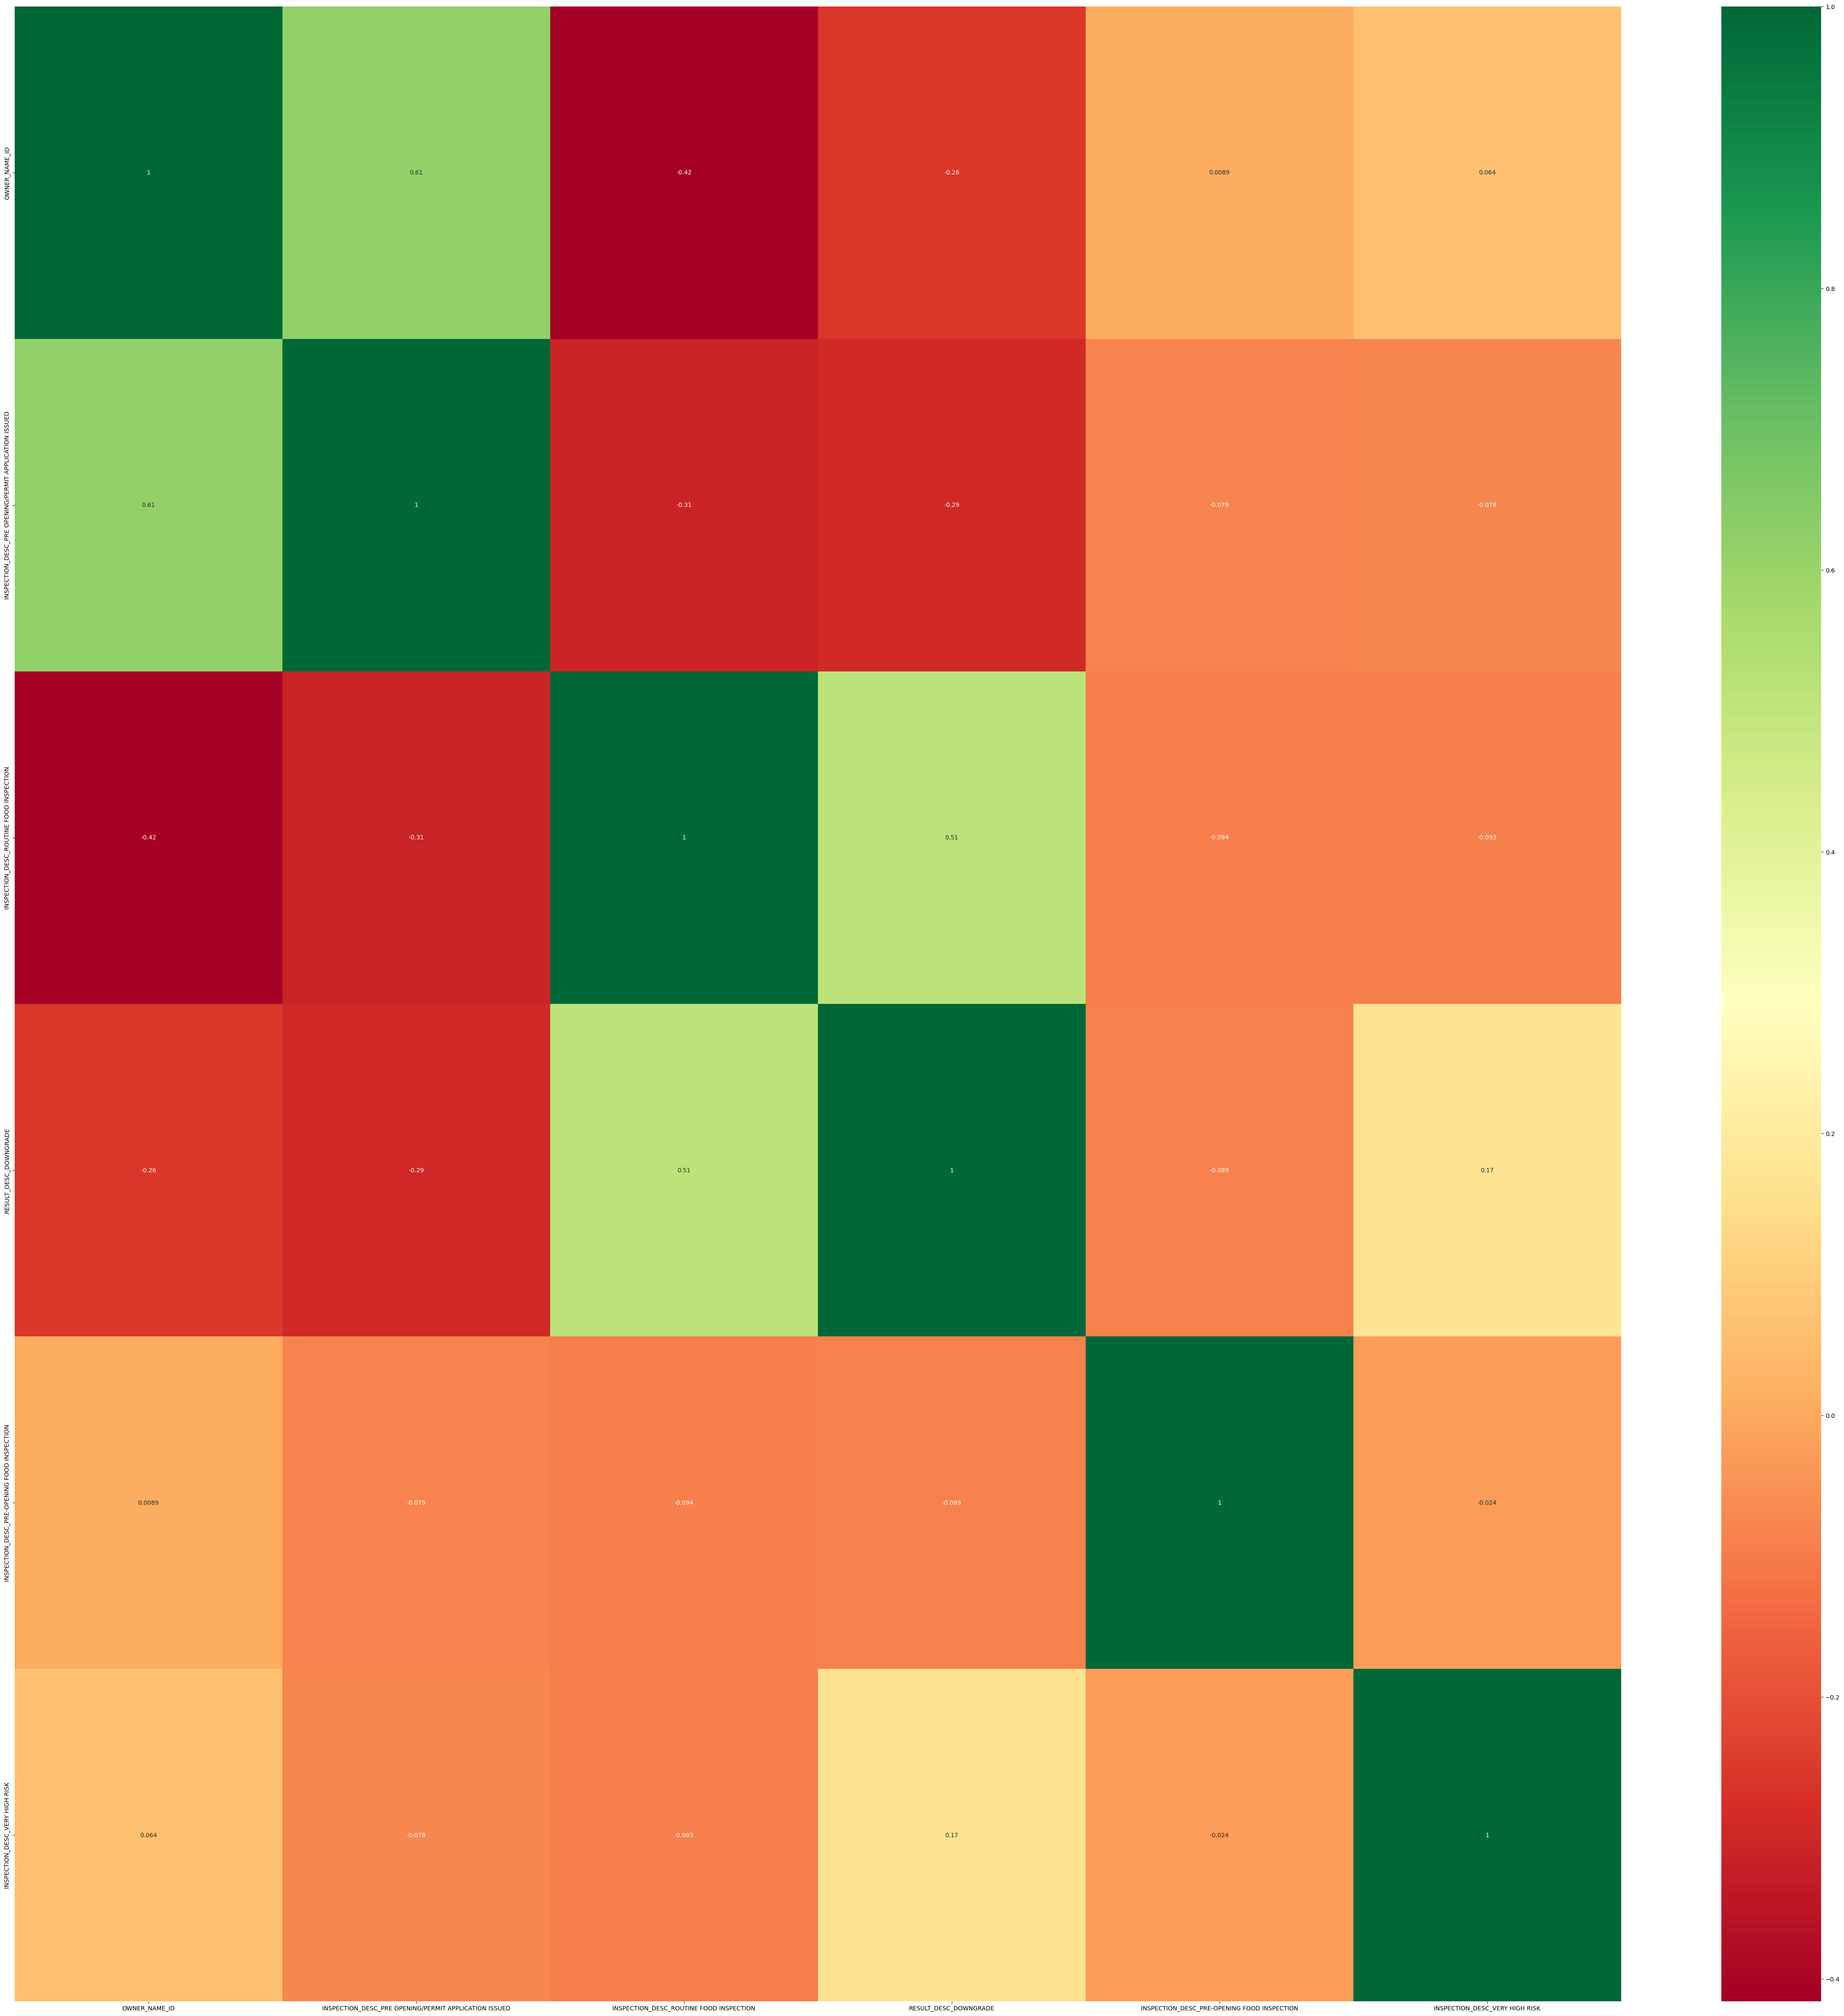

In [ ]:
data_corr = top_five.corr()
plt.figure(figsize=(60,60))
sns.heatmap(data_corr, annot=True, cmap='RdYlGn')

Text(0.5, 0, 'Top Ten Features With Target')

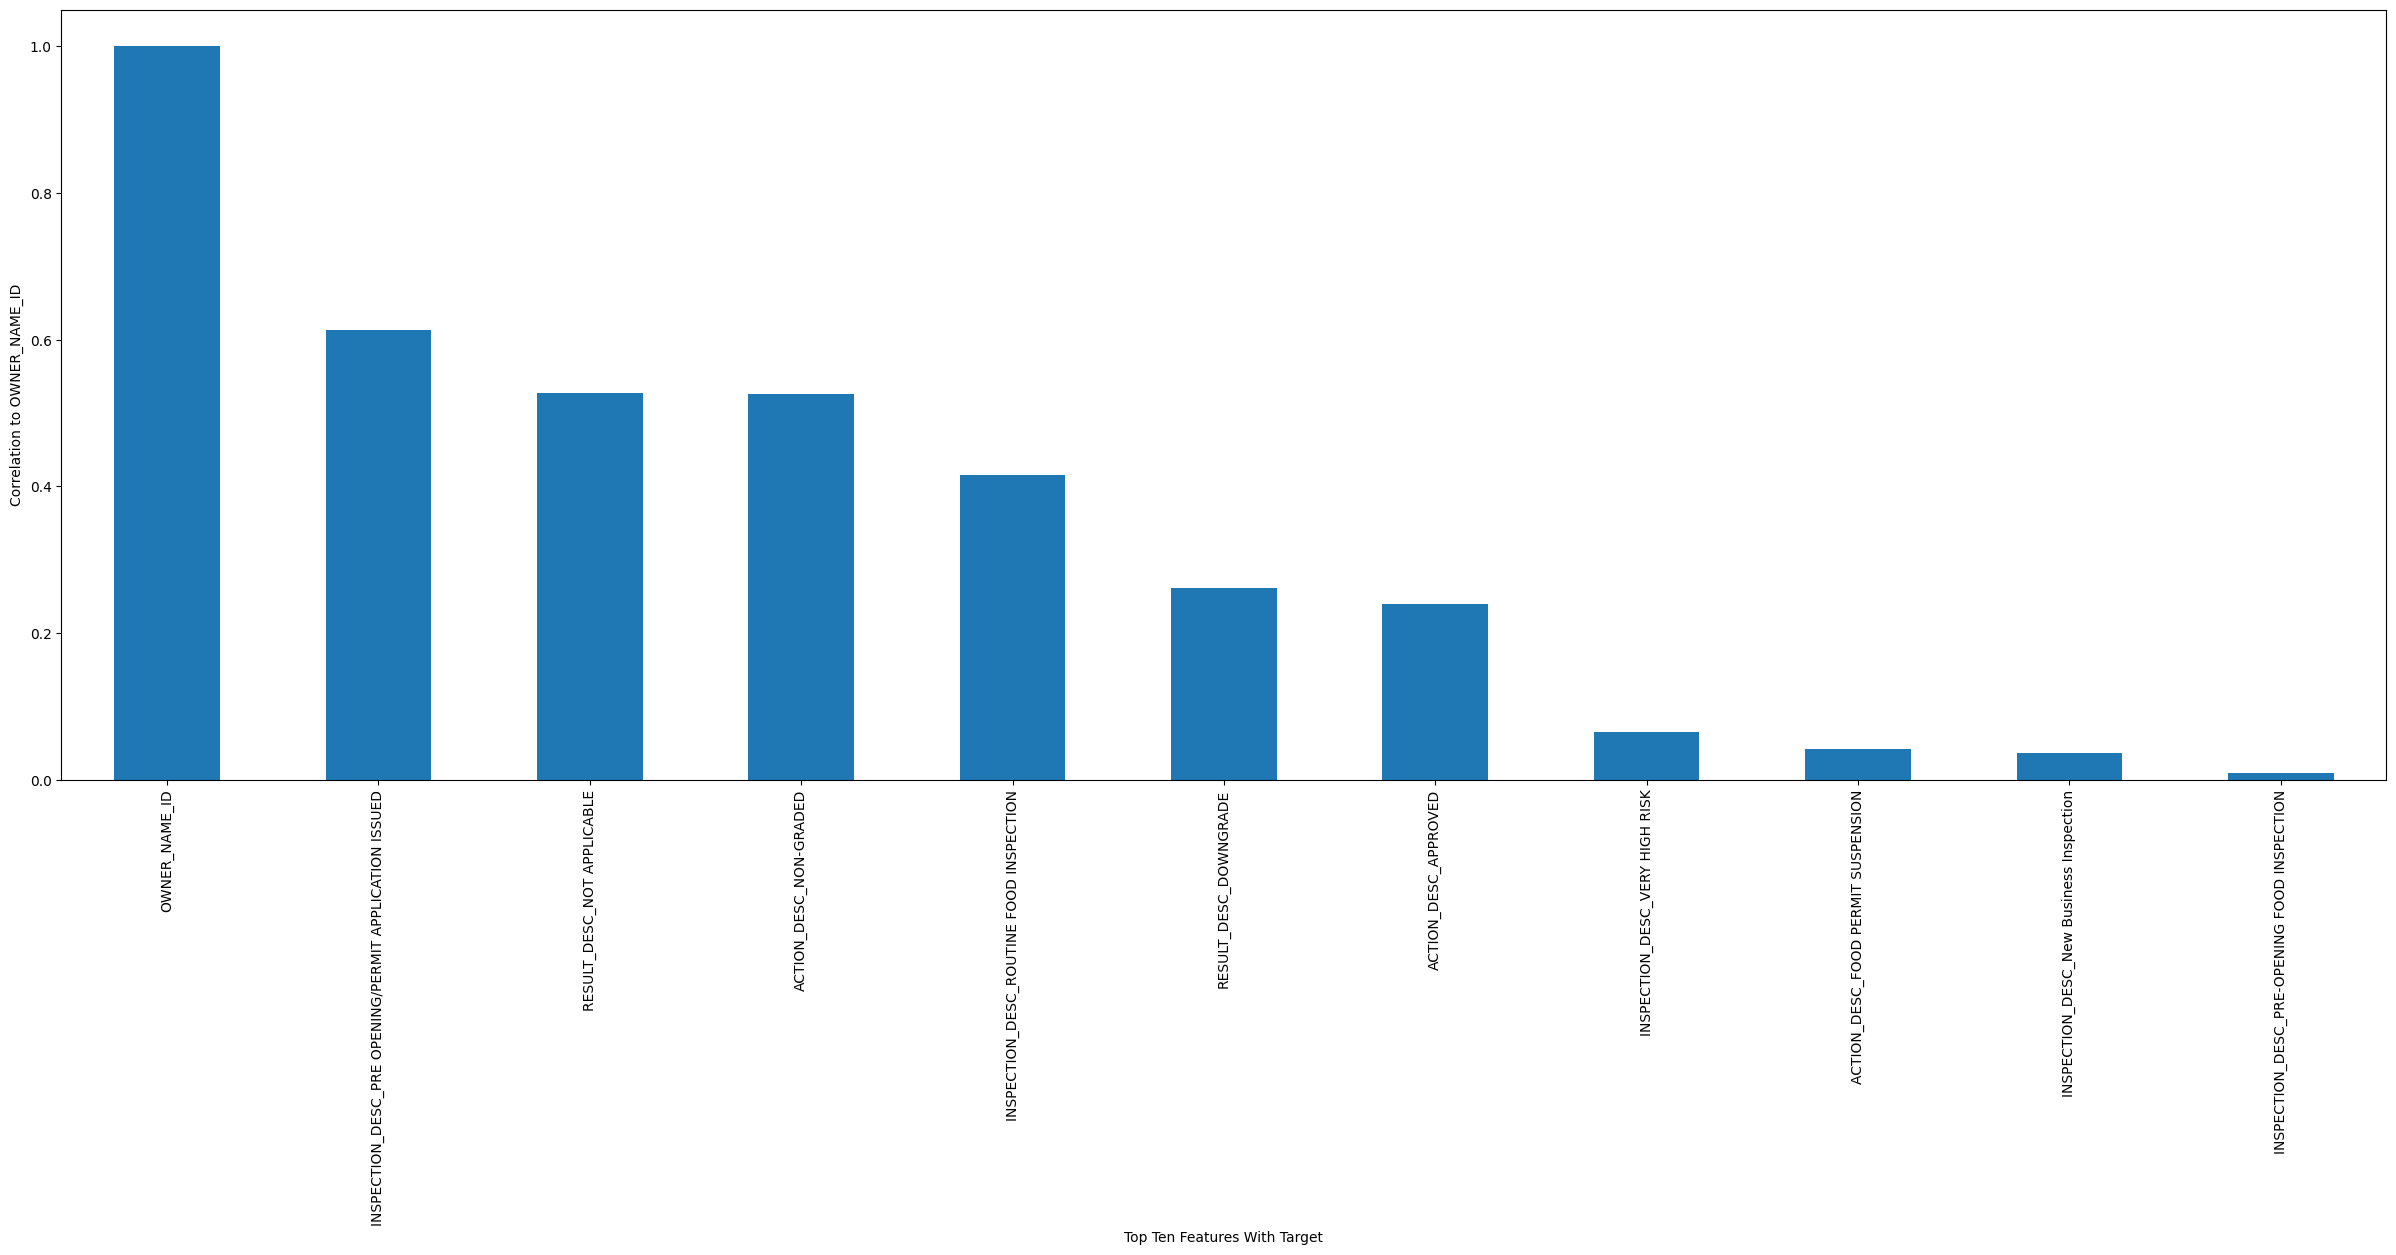

In [ ]:
ax = top_ten.corr()['OWNER_NAME_ID'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (30,10))
ax.set_ylabel('Correlation to OWNER_NAME_ID')
ax.set_xlabel('Top Ten Features With Target')

This correlation matrix and pair plot will help us visualize and understand the data we are working with.

##Data Graphs



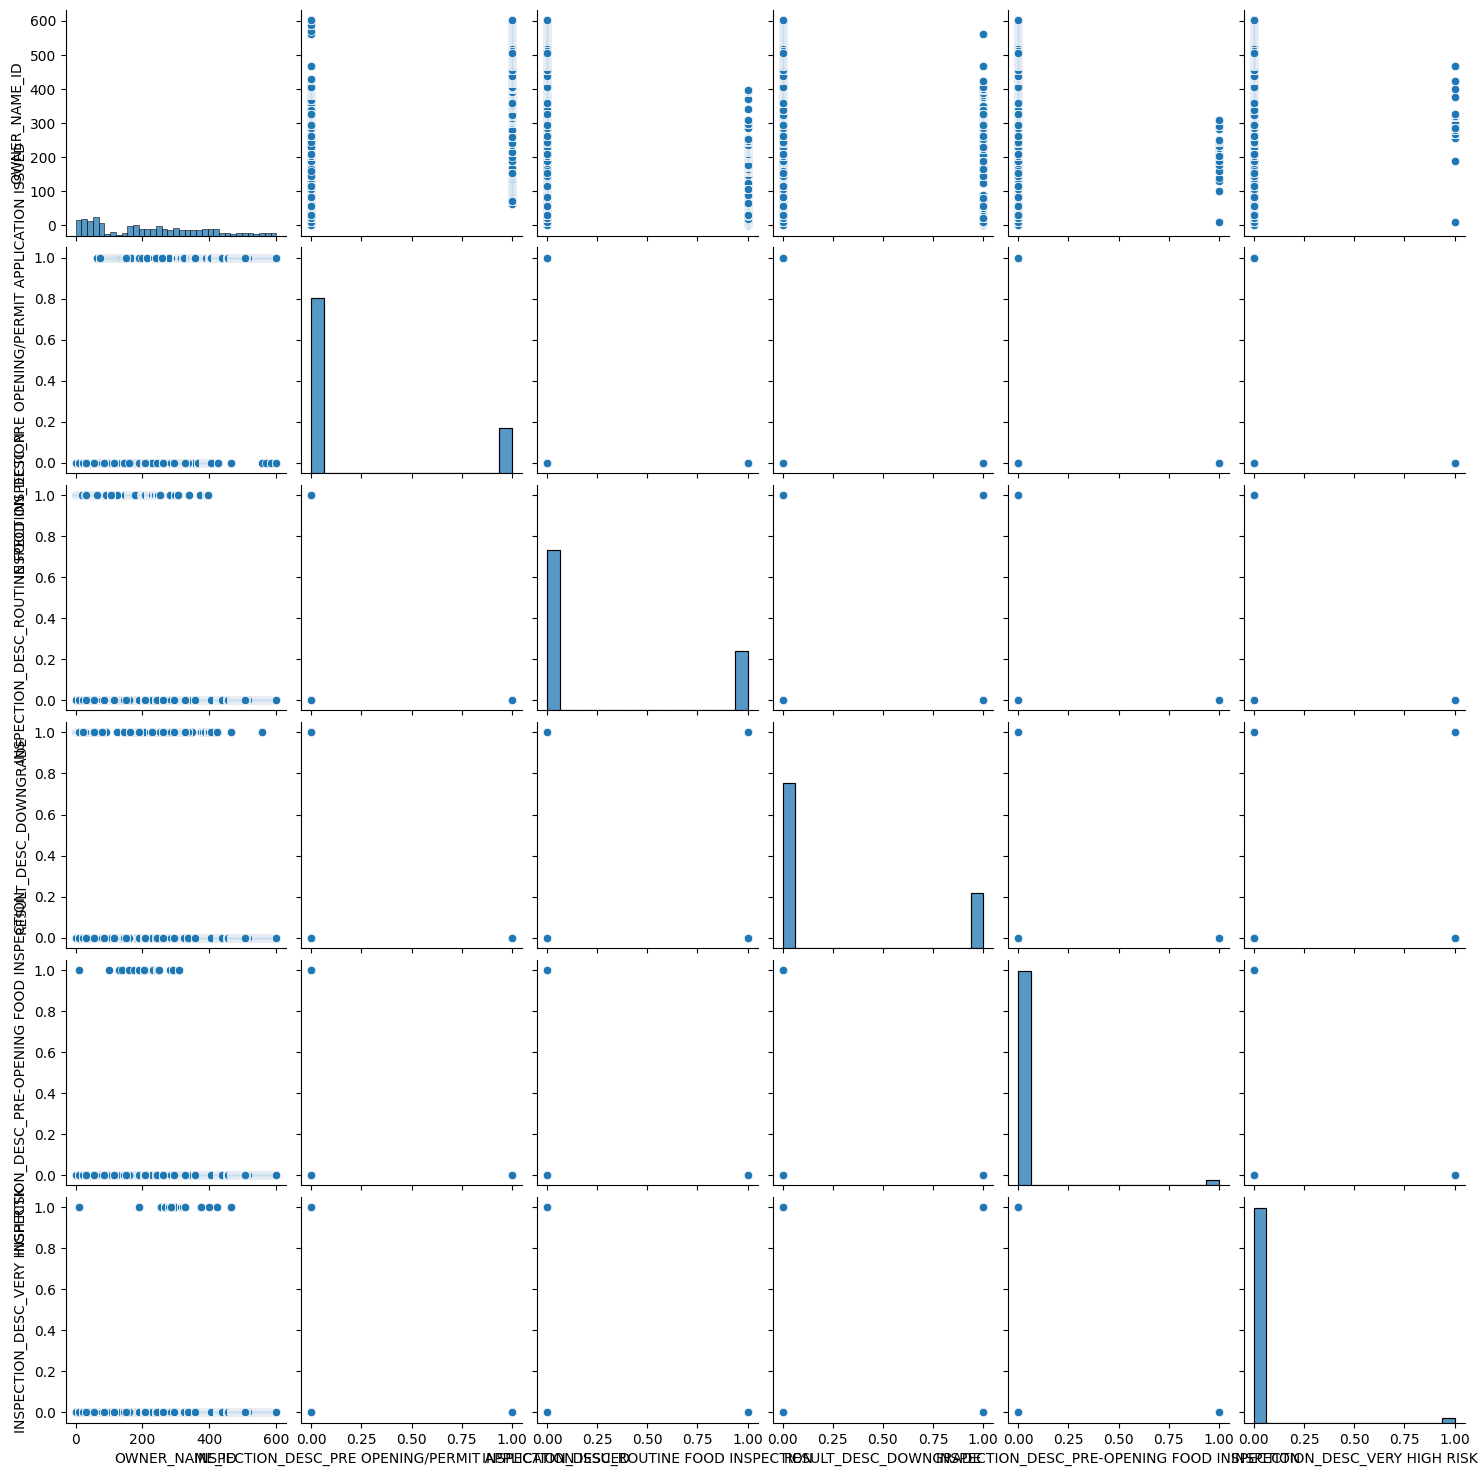

In [ ]:
sns.pairplot(top_five)

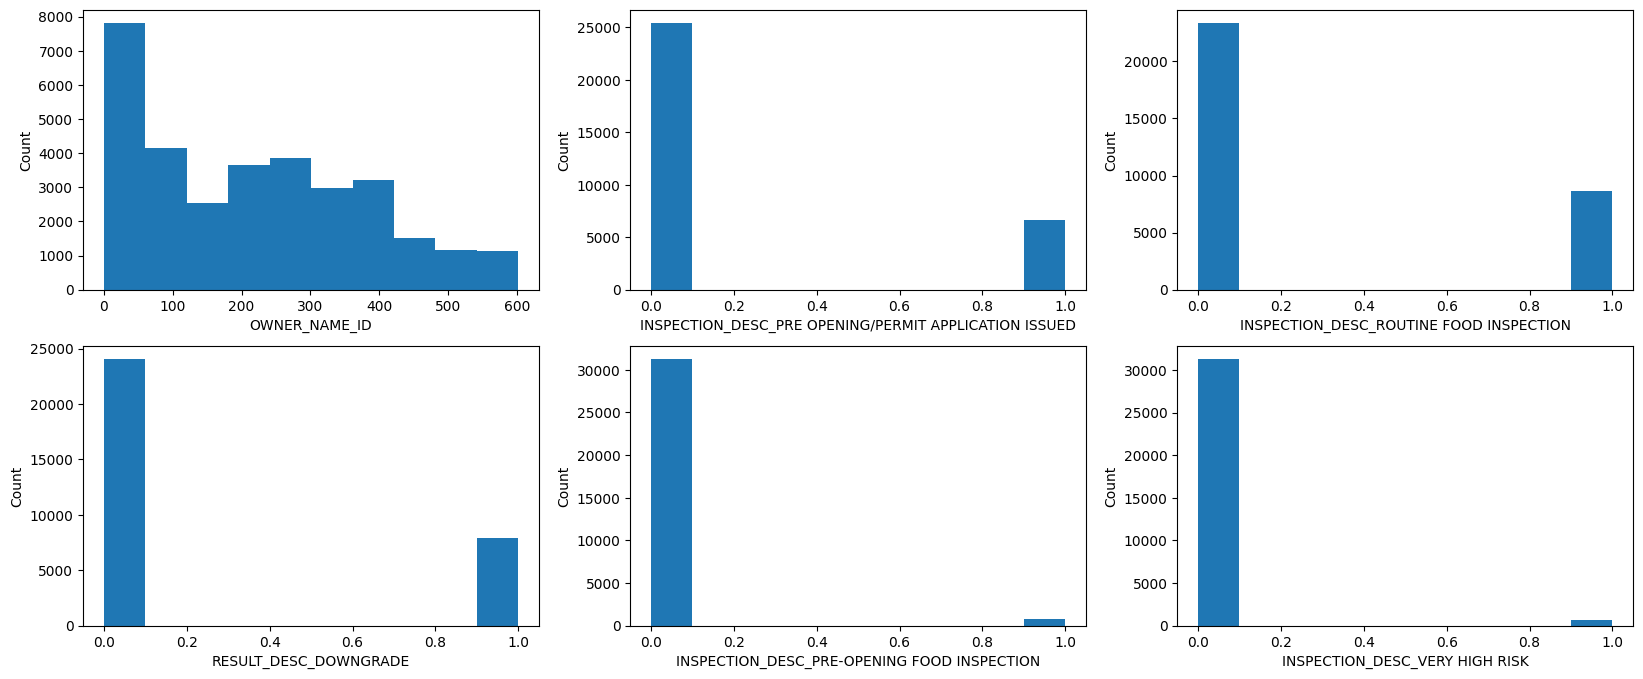

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))
column_names = top_five.columns
n = 0
for ax in axs.flatten():
    if n < len(column_names):
        ax.hist(top_five[column_names[n]])
        ax.set_xlabel(column_names[n])
        ax.set_ylabel('Count')
        n = n + 1
    else:
        ax.set_axis_off()

#Data Processing


In [ ]:
top_five.describe()

,OWNER_NAME_ID,INSPECTION_DESC_PRE OPENING/PERMIT APPLICATION ISSUED,INSPECTION_DESC_ROUTINE FOOD INSPECTION,RESULT_DESC_DOWNGRADE,INSPECTION_DESC_PRE-OPENING FOOD INSPECTION,INSPECTION_DESC_VERY HIGH RISK
count,32005.000000,32005.000000,32005.000000,32005.000000,32005.000000,32005.000000
mean,216.071801,0.206093,0.270395,0.248430,0.023434,0.022746
std,162.187992,0.404504,0.444171,0.432109,0.151279,0.149096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,203.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,339.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,602.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
count_nulls(top_five)

(32005, 6)
Series([], dtype: int64)


After looking over the data and ensuring no nulls appeared, I'm comfortable with going forward with the data.

##Top Five

In [ ]:
count_nulls(top_five)

(32005, 6)
Series([], dtype: int64)


In [ ]:
X = top_five.drop('OWNER_NAME_ID', axis = 1)
y = top_five['OWNER_NAME_ID']

In [ ]:
X.shape

(32005, 5)

In [ ]:
y.shape

(32005,)

###Modeling and Testing

I am going to start with a Decision Tree, then I will see if I can improve predictions with XGBoost.

Decision Tree

In [ ]:
numLoops = 500

f1_scores = np.zeros(numLoops)
accuracies = np.zeros(numLoops)
recalls = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1_scores[idx] = f1_score(y_test, y_pred, average='macro')
  accuracies[idx] = accuracy_score(y_test, y_pred)
  recalls[idx] = recall_score(y_test, y_pred, average='macro')

print(f"CV F1: {f1_scores.mean().round(2)}")
print(f"CV Accuracy: {accuracies.mean().round(2)}")
print(f"CV Recall: {recalls.mean().round(2)}")

CV F1: 0.0
CV Accuracy: 0.05
CV Recall: 0.01


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Compute the accuracy of the decision tree classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree classifier on test set: {:.2f}".format(accuracy))

# Post-pruning using cost-complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last element of clfs, which corresponds to the most complex tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Compute the accuracy of the pruned trees on the test set
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Find the index of the tree with the highest accuracy
best_idx = np.argmax(acc_scores)
best_clf = clfs[best_idx]
best_alpha = ccp_alphas[best_idx]

# Print the accuracy of the best tree and its complexity parameter
print("Accuracy of best tree on test set: {:.2f}".format(acc_scores[best_idx]))
print("Complexity parameter of best tree: {:.4f}".format(best_alpha))

Accuracy of decision tree classifier on test set: 0.05
Accuracy of best tree on test set: 0.05
Complexity parameter of best tree: 0.0000


In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
f1_depth = np.zeros(len(max_depths))
acc_depth = np.zeros(len(max_depths))
rec_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  f1_scores = np.zeros(numLoops)
  accuracies = np.zeros(numLoops)
  recalls = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1_scores[idx] = f1_score(y_test, y_pred)
    accuracies[idx] = accuracy_score(y_test, y_pred)
    recalls[idx] = recall_score(y_test, y_pred)

  f1_depth[n] = f1_scores.mean()
  acc_depth[n] = accuracies.mean()
  rec_depth[n] = recalls.mean()

print(f"Max Depth F1 Scores: {f1_depth}")
print(f"Max Depth Accuracies: {acc_depth}")
print(f"Max Depth Recalls: {rec_depth}")

ValueError: ignored

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Top Five Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 30.5)
plt.grid()

In [ ]:
numLoops = 10

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=25)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")

In [ ]:
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(model, feature_names=X.columns, filled=True)

In [ ]:
display(graphviz.Source(tree.export_graphviz(model, feature_names=X.columns, filled = True)))

XGBoost

In [ ]:
print(y.shape)

(32005,)


In [ ]:
print(X_train.shape)

(27204, 5)


In [ ]:


# Assuming top_five is your DataFrame and OWNER_NAME_ID is what you want to predict

X = top_five.drop('OWNER_NAME_ID', axis = 1)
y = top_five['OWNER_NAME_ID']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, objective = 'multi:softmax')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


ValueError: ignored

In [ ]:
numLoops = 10
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, learning_rate = 0.2, max_depth = 26, n_estimators = 60)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')

###Top Five Conclusion
The top five features were modeled and tested with a Decision Tree where it achieved an RMSE below 9.4 consistently at a depth of 5, then ran through XGBoost where it achieved an RMSE below 7.65 consistently.


##Top Three
After seeing the Feature graph I decided I wanted to run another Decision Tree and XGBoost with the top three features.


In [ ]:
top_three = top_five[['Popularity','Artist Followers', 'Index', 'Streams']]

In [ ]:
X = top_three.drop('Popularity', axis = 1)
y = top_three['Popularity']

###Modeling and Testing

Decision Tree

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")

In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std()

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Top Three Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")

In [ ]:
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(model, feature_names=X.columns, filled=True)

XGBoost

In [ ]:
numLoops = 500
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

KeyboardInterrupt: ignored

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth':[3,4,5,6,7],
 'learning_rate' : [0.1, 0.2, 0.3, 0.4],
 'n_estimators': [20,40,60,80,100,120,140],
}

# Perform the grid search
gsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'),
                       param_grid = param_test,
                       scoring='neg_mean_squared_error',
                       cv=5
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

In [ ]:
numLoops = 500
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, learning_rate = 0.2, max_depth = 4, n_estimators = 80)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

###Top Three Conclusion
The top five features were modeled and tested with a Decision Tree where it achieved an RMSE below 9.28 consistently at a depth of 5, then ran through XGBoost where it achieved an RMSE below 7.57 consistently.


#Conclusion
After working through the data I was able to use a Random Forest to find my top five features for testing, visualize them through correlation matrix and graphs, then do final testing and modeling through Decision Tree with an RMSE below 9.4 and XGBoost with a final RMSE below 7.65. After that, I modeled and tested the top three features that had an RMSE below 9.28 with the Decision Tree and an RMSE below 7.57 with XGBoost Going forward I will accomplish this with other more expansive features with the overall goal of narrowing the RMSE and making a better predictive model.
